In [55]:
# The import order is important
import matplotlib as mpl
mpl.use('cairo') 
%matplotlib inline
import matplotlib.pyplot as plt

In [56]:
import graph_tool.all as gt
from numpy.random import seed, random
from scipy.linalg import norm

In [57]:
# Create a graph (from https://graph-tool.skewed.de/static/doc/flow.html)
gt.seed_rng(42)
seed(42)
points = random((400, 2))
points[0] = [0, 0]
points[1] = [1, 1]
g, pos = gt.triangulation(points, type="delaunay")
g.set_directed(True)
edges = list(g.edges())
# reciprocate edges
for e in edges:
   g.add_edge(e.target(), e.source())
# The capacity will be defined as the inverse euclidean distance
cap = g.new_edge_property("double")
for e in g.edges():
    cap[e] = min(1.0 / norm(pos[e.target()].a - pos[e.source()].a), 10)
g.edge_properties["cap"] = cap
g.vertex_properties["pos"] = pos

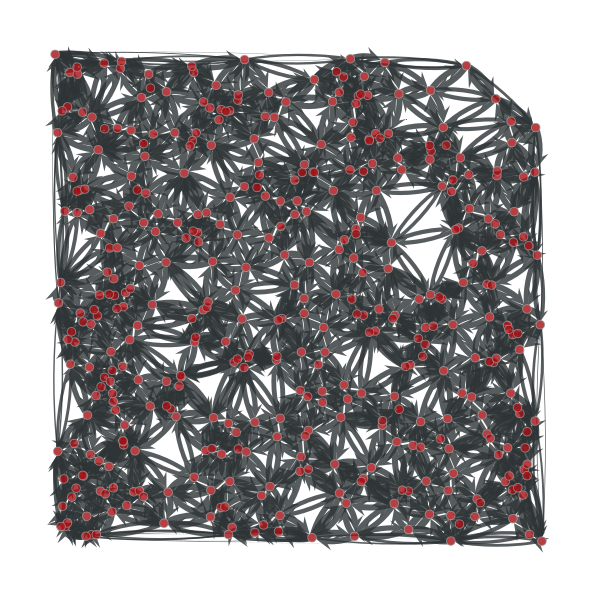

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1d738fb20, at 0x1d73647c0>

In [58]:
# Draw the graph and print inline in the notebook
gt.graph_draw(g, pos=pos, edge_pen_width=gt.prop_to_size(cap, mi=0, ma=3, power=1), output_size=(300,300))

In [50]:
g = gt.Graph(directed=False)

v1 = g.add_vertex()
v2 = g.add_vertex()

e = g.add_edge(v1, v2)

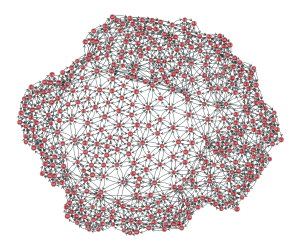

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1d738fb20, at 0x1d7364100>

In [59]:
gt.graph_draw(g, vertex_text=g.vertex_index, output_size=(150,150))

# $K_{10}$

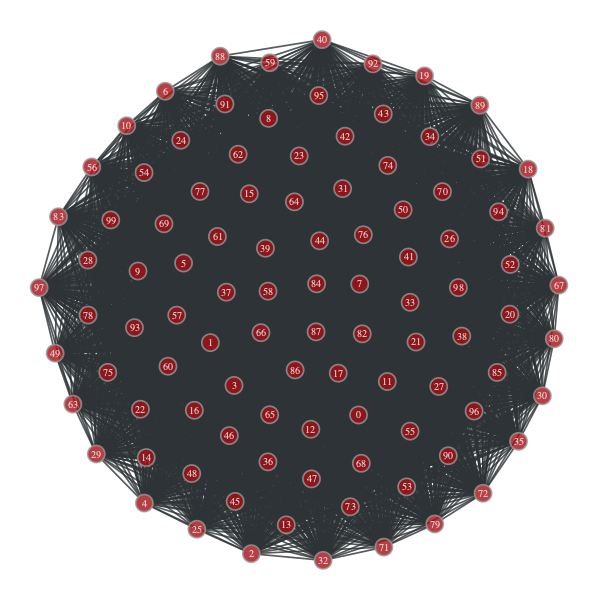

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x1d73991c0, at 0x1d739ed60>

In [62]:
k10 = gt.complete_graph(100)

gt.graph_draw(k10, vertex_text=k10.vertex_index, output_size=(300,300))